**Step 0: Import Library and Load Data**

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [91]:
df = pd.read_excel("daftar-harga-rumah-jaksel.xlsx", header=1)
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


**Step 1: Data Understanding**

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [93]:
df.shape

(1001, 7)

In [94]:
df["KOTA"].unique()

array(['JAKSEL'], dtype=object)

**Step 2: Data Cleaning**

In [95]:
df.isna().sum()

HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
KOTA     0
dtype: int64

In [96]:
df.duplicated().sum()

np.int64(70)

In [97]:
df = df.drop_duplicates().copy()

In [98]:
df.shape

(931, 7)

In [99]:
df = df.drop(["KOTA"], axis=1).copy()

df.head()

,HARGA,LT,LB,JKT,JKM,GRS
0,28000000000,1100,700,5,6,ADA
1,19000000000,824,800,4,4,ADA
2,4700000000,500,400,4,3,ADA
3,4900000000,251,300,5,4,ADA
4,28000000000,1340,575,4,5,ADA


In [100]:
# Renaming columns
df = df.rename(columns={
    "HARGA":"House_Price",
    "LT":"Land_Area",
    "LB":"Building_Area",
    "JKT":"Num_Bedrooms",
    "JKM":"Num_Bathrooms",
    "GRS":"Garage_Availability"
})

df.head()

,House_Price,Land_Area,Building_Area,Num_Bedrooms,Num_Bathrooms,Garage_Availability
0,28000000000,1100,700,5,6,ADA
1,19000000000,824,800,4,4,ADA
2,4700000000,500,400,4,3,ADA
3,4900000000,251,300,5,4,ADA
4,28000000000,1340,575,4,5,ADA


**Step 3: Data Prerpocessing**

In [101]:
# Label Encoder
label_encoder = LabelEncoder()
df["Garage_Availability"]=label_encoder.fit_transform(df["Garage_Availability"]) 

df.head()

,House_Price,Land_Area,Building_Area,Num_Bedrooms,Num_Bathrooms,Garage_Availability
0,28000000000,1100,700,5,6,0
1,19000000000,824,800,4,4,0
2,4700000000,500,400,4,3,0
3,4900000000,251,300,5,4,0
4,28000000000,1340,575,4,5,0


In [102]:
# Splitting Data
X = df.drop(["House_Price"], axis=1)
y = df["House_Price"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

**Step 4: Training and Evaluation Data**

In [104]:
# Model Random Forest
modelrf = RandomForestRegressor(random_state=42, n_estimators=200)
modelrf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [105]:
score_rf = modelrf.score(X_test, y_test)
print(f"Akurasi Model Random Forest adalah", score_rf)

Akurasi Model Random Forest adalah 0.564420453452128


In [106]:
# Evaluasi Model
y_pred_rf = modelrf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [107]:
print(f"MSE: {mse_rf}, R^2: {r2_rf}")

MSE: 6.83193442559814e+20, R^2: 0.564420453452128


**Step 5: Testing**

In [108]:
new_data = {
    "Land_Area": 2000,
    "Building_Area": 1200,
    "Num_Bedrooms": 8,
    "Num_Bathrooms": 10,
    "Garage_Availability": 1
}
input_df = pd.DataFrame([new_data])

input_df

,Land_Area,Building_Area,Num_Bedrooms,Num_Bathrooms,Garage_Availability
0,2000,1200,8,10,1


In [111]:
prediction = modelrf.predict(input_df)
prediction_formatted = round(prediction[0],2)
print(f"Estimasi harga rumah - RP {prediction_formatted}")

Estimasi harga rumah - RP 76511000000.0


**Step 6:Visualization Model Prediction**

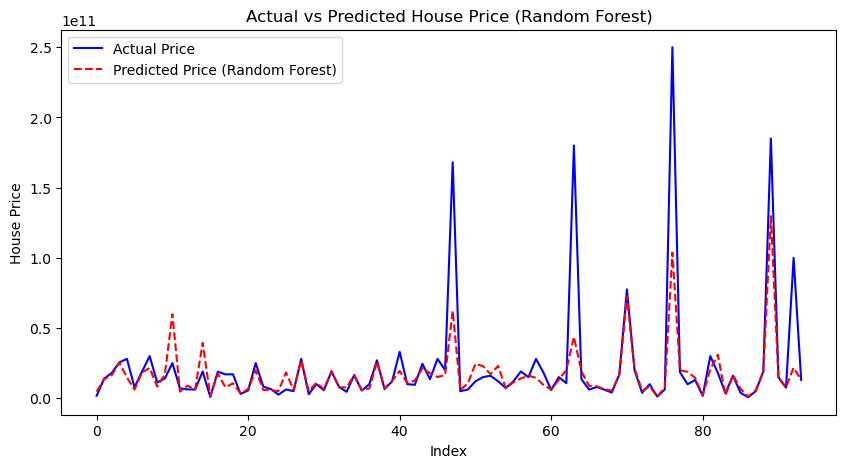

In [115]:
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, color="blue", label="Actual Price", linestyle="-")
plt.plot(range(len(y_pred_rf)), y_pred_rf, color="red", label="Predicted Price (Random Forest)", linestyle="--")

plt.title("Actual vs Predicted House Price (Random Forest)")
plt.xlabel("Index")
plt.ylabel("House Price")
plt.legend()
plt.show()